In [1]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'hw1'))
	print(os.getcwd())
except:
	pass


/home/renjiezhu/school_workspace/recommender_system/hw1


 # Homework 1 - Renjie Zhu - A53266114
 Data parsing using ```csv.DictReader```.

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy as sp
import random

data_filename = "amazon_reviews_us_Gift_Card_v1_00.tsv"


In [3]:
data = []



In [4]:
with open(data_filename, newline="") as data_file:

    reader = csv.DictReader(data_file, delimiter="\t")

    for row in reader:
        data.append(row)



In [5]:
rating = {}


In [6]:
for ele in data:
    if ele["star_rating"] not in rating.keys():
        rating[ele["star_rating"]] = 0
    else:
        rating[ele["star_rating"]] += 1



 1. As shown in the above cell,
 5 stars : 129028,
 4 stars : 9807,
 3 stars : 3146,
 2 stars : 1559,
 1 stars : 4765,

<BarContainer object of 5 artists>

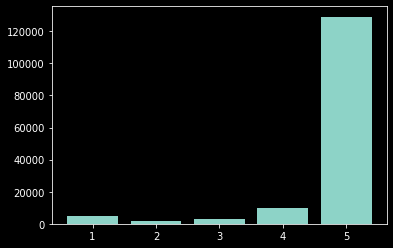

In [7]:
rating_list = [(k,v) for k,v in rating.items()]
rating_list.sort()
rts, nums = zip(*rating_list)
plt.bar(rts,nums)



 3.

 To train a predictor defined as
 $ R = \theta_0 + \theta_1 v + \theta_2 l $,
 we have

 $ R = \Theta \vec{x} = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{pmatrix}
 \begin{pmatrix} 1 \\ v \\ l \end{pmatrix}
 $

 where $R$ is rating, $v$ is $1$ if verified and $0$ otherwise, and $l$ is length of
 the review.

In [8]:
def parse_XR(data):
    X = []
    R = []

    for ele in data:
        x = np.ones(3)
        if ele["verified_purchase"].upper() != "Y":
            x[1] = 0
        x[2] = len(ele["review_body"])

        X.append(x)
        R.append(int(ele["star_rating"]))

    X = np.array(X)
    R = np.array(R)

    return X, R



In [9]:
X, R = parse_XR(data)
t_3 = sp.linalg.lstsq(X, R)


In [10]:
print(f"We have theta_0 = {t_3[0][0]}, theta_1 = {t_3[0][1]}, theta_2 = {t_3[0][2]}.")



We have theta_0 = 4.845035042818844, theta_1 = 0.04985805885691129, theta_2 = -0.0012454552628085244.


 4.

 $\theta_0$ is a value very close to 5. This is obvious from the previous distribution
 where most reviews are given a five star. $\theta_1$ is a small positive number, and
 since the possible value is only 0 or 1, this doesn't mean much in this situation.
 $\theta_2$ is a even smaller number, but since the review length is usually a larger
 number than 5, this is expected. $\theta_2$ is also negative, which means that
 the longer the review, the lower the rating. An interpretation of this is people
 tend to write a longer criticizing review for a bad purchase experience.

 The predictor now only considers if the review is verified, so the problem becomes

 $R = \Theta \vec{x} = \begin{pmatrix} \theta_0 \\ \theta_1  \end{pmatrix}
 \begin{pmatrix} 1 \\ v \end{pmatrix}$

In [11]:
t_4 = sp.linalg.lstsq(X[:,:2],R)
print(f"We have theta_0 = {t_4[0][0]}, theta_1 = {t_4[0][1]}.")


We have theta_0 = 4.578142999769574, theta_1 = 0.16793391705288743.


 If we do not consider the length of the review and focus only on if the
 purchase is verified, the final score is now more affected than in the
 previous problem, from 0.050 to 0.168. This tells us that a verified buyer
 is more likely to give a higher rating though difference is small. It
 may be indicating that a non-verified buyer is occationally giving very
 low ratings to sabotage the product rating.

In [12]:
def split_train_test(data, per):

    split = int(np.ceil(per * len(data)))

    train_set = data[:split]
    test_set = data[split:]
    
    return train_set, test_set


 5.

 Splitting the data into two portions

In [13]:
train_set, test_set = split_train_test(data, 0.9)

X_t, R_t = parse_XR(train_set)
t_train = sp.linalg.lstsq(X_t[:,:2],R_t)
print(f"For the 90% training set, we have theta_0 = {t_train[0][0]}, theta_1 = {t_train[0][1]}.")
t_train = np.array(t_train[0])


For the 90% training set, we have theta_0 = 4.439667128987656, theta_1 = 0.31636877935160035.


In [14]:
pred_t = X_t[:,:2] @ t_train.reshape((2,1))
mse_t = np.mean((R_t.reshape((-1,1)) - pred_t) ** 2)


In [15]:
X_te, R_te = parse_XR(test_set)
pred_te = X_te[:,:2] @ t_train.reshape((2,1))
mse_test = np.mean((R_te.reshape((-1,1)) - pred_te) ** 2)


In [16]:
def train_predict(data, per):
    train_set, test_set = split_train_test(data, per)

    X_t, R_t = parse_XR(train_set)
    X_te, R_te = parse_XR(test_set)

    t_train = sp.linalg.lstsq(X_t[:,:2],R_t)
    t_train = np.array(t_train[0])

    pred_t = X_t[:,:2] @ t_train.reshape((2,1))
    mse_t = np.mean((R_t.reshape((-1,1)) - pred_t) ** 2)

    pred_te = X_te[:,:2] @ t_train.reshape((2,1))
    mse_te = np.mean((R_te.reshape((-1,1)) - pred_te) ** 2)

    return mse_t, mse_te


7.

 We use different proportions for the train data.

In [17]:
train_percentage = np.linspace(0.05, 0.95, 57)

mse_train = []
mse_test = []

for per in list(train_percentage):
    mse_t, mse_te = train_predict(data, per)
    mse_train.append(mse_t)
    mse_test.append(mse_te)


<function matplotlib.pyplot.show(*args, **kw)>

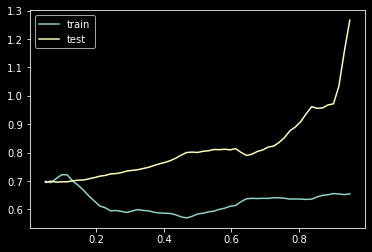

In [18]:
plt.plot(train_percentage, mse_train, label="train")
plt.plot(train_percentage, mse_test, label="test")
plt.legend()
plt.show



The size of the training set definitely has a great effect on the testing 
performance. As shown in the graph above, we can see that for a larger testing
set, the testing performance goes down (looks like exponentially) and the 
training error stays low. When the training set is too large, the training
can overfit for the training set. The
data is not shuffled and may have some trends lie under 
the ordering of the data which can contribute to the poor testing performance
for a larger size training set. 

In [19]:
def parse_VR(data):
    X = []
    R = []

    for ele in data:
        x = np.ones(3)
        x[1] = int(ele["star_rating"])
        x[2] = len(ele["review_body"])
        X.append(x)

        if ele["verified_purchase"].upper() != "Y":
            R.append(0)
        else:
            R.append(1)

    X = np.array(X)
    R = np.array(R)

    return X, R


In [20]:
X_t, R_t = parse_VR(train_set)
X_te, R_te = parse_VR(test_set)
model = linear_model.LogisticRegression()
model.fit(X_t, R_t)


/home/renjiezhu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:

pred_LR = model.predict(X_te)


In [22]:
correct_pred = (pred_LR == R_te)
accuracy = sum(correct_pred) / len(correct_pred)
print(f"The prediction accuracy is {accuracy*100}.")

label_p = sum(R_te) / len(R_te)
pred_p = sum(pred_LR) / len(R_te)
print(f"label positive: {label_p*100}, prediction positive: {pred_p*100}.")


The prediction accuracy is 55.97734475085968.
label positive: 55.95711684984155, prediction positive: 99.89886049490931.


8. The accuracy is pretty poor. The accuracy is basically how many positives
there are as the predictor is charging towards predicting all of them positive.

In [23]:
def parse_own(data):
    X = []
    R = []

    for ele in data:
        x = np.ones(5)
        x[1] = int(ele["star_rating"])
        x[2] = len(ele["review_body"])
        if int(ele["total_votes"]) > 0:
            x[3] = int(ele["helpful_votes"]) / int(ele["total_votes"])
        else:
            x[3] = 0
        x[4] = ele["review_body"].count("!")
        X.append(x)

        if ele["verified_purchase"].upper() != "Y":
            R.append(0)
        else:
            R.append(1)

    X = np.array(X)
    R = np.array(R)

    return X, R


In [24]:
train_set, test_set = split_train_test(data, 0.9)
X_t, R_t = parse_own(train_set)
X_te, R_te = parse_own(test_set)
model = linear_model.LogisticRegression()
model.fit(X_t, R_t)

/home/renjiezhu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred_LR = model.predict(X_te)

correct_pred = (pred_LR == R_te)
accuracy = sum(correct_pred) / len(correct_pred)
print(f"The prediction accuracy is {accuracy*100}.")

label_p = sum(R_te) / len(R_te)
pred_p = sum(pred_LR) / len(R_te)
print(f"label positive: {label_p*100}, prediction positive: {pred_p*100}.")

The prediction accuracy is 55.997572651877825.
label positive: 55.95711684984155, prediction positive: 99.91908839592745.


The new model is
$$
p(\text{review is verified})\approx \sigma (
    \theta_0 + \theta_1 \times [\text{star rating}] + \theta_2 \times [review length]
    + \theta_3 \times \frac{[\text{helpful votes}]}{[\text{total votes}]}
    + \theta_4 \times [\text{vine}] + \theta_5 \times [\text{# of !'s in review body}]
)
$$
After closer inspection of the data, it seems that there are no vine users in the dataset
despite it being one of the fields. So, even though whether a user is a vine user can 
be a good indicator of the validity of the review, this feature is taken out of the 
equation above. 

Also, the number of "!"'s in the review body is also probably not doing anything as most
doesn't have one.

The result is basically the same and is expected. Without understanding more of the review
body with some NLP techniques, other features are just useless and the training data is 
just so heavily biased.

In [26]:
random.shuffle(data)
train_set, test_set = split_train_test(data, 0.9)
X_t, R_t = parse_own(train_set)
X_te, R_te = parse_own(test_set)
model = linear_model.LogisticRegression()
model.fit(X_t, R_t)


/home/renjiezhu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
pred_LR = model.predict(X_te)

correct_pred = (pred_LR == R_te)
accuracy = sum(correct_pred) / len(correct_pred)
print(f"The prediction accuracy is {accuracy*100}.")

label_p = sum(R_te) / len(R_te)
pred_p = sum(pred_LR) / len(R_te)
print(f"label positive: {label_p*100}, prediction positive: {pred_p*100}.")


The prediction accuracy is 90.79630503674736.
label positive: 91.00532668060144, prediction positive: 99.6830962173825.


As described above, the training data is so heavily biased which leads to a trial with
shuffling the data. The results are gives a better accuracy (also more consistent 
because of the shuffling). The predictor, however, still predicts positive for
almost all reviews.